In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pylab
import mahotas as mh

In [3]:
img=mh.imread('Data/sample.tif')

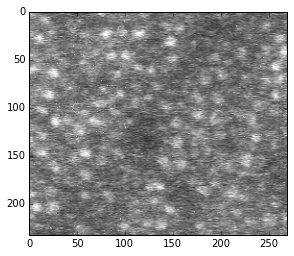

In [4]:
pylab.imshow(img)

In [5]:
print img.shape

(233, 270, 4)


In [6]:
img=img[:,:,0]

In [20]:
print img.shape
print img.max()
print img.min()

(233, 270)
255
0


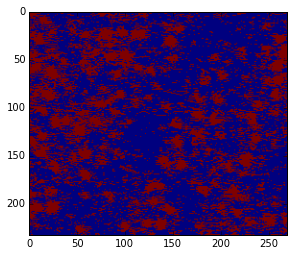

In [8]:
T = mh.thresholding.otsu(img)
pylab.imshow(img > T)

In [58]:
imgf = mh.gaussian_filter(img,4)
print imgf.shape
print imgf.max()
print imgf.min()

(233, 270)
192.60795559
75.8079078432


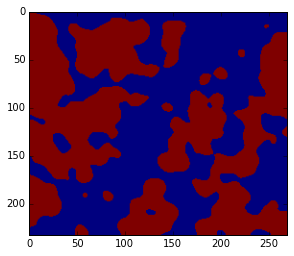

In [56]:
T= mh.thresholding.otsu(imgf.astype(np.uint8))
pylab.imshow(imgf > T)

In [59]:
rmax = mh.regmax(imgf)
se = np.ones((5,5))
rmax_big = mh.morph.dilate(rmax,se)
over = mh.overlay(imgf.astype(np.uint8),rmax)
over2= mh.overlay(imgf.astype(np.uint8),rmax_big)

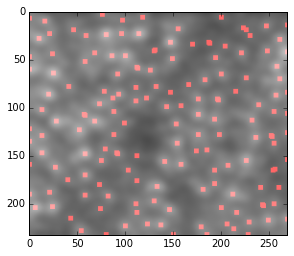

In [60]:
pylab.imshow(over2)

In [29]:
seeds,nr_nuclei = mh.label(rmax)
print nr_nuclei

352


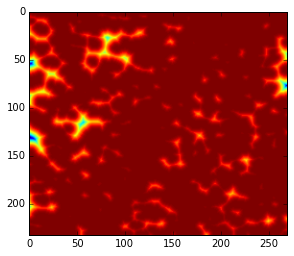

In [27]:
dist = mh.distance(imgf > T)
dist = dist.max() - dist
dist -= dist.min()
dist = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.imshow(dist)

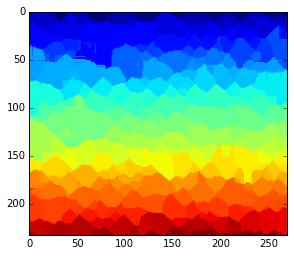

In [31]:
nuclei = mh.cwatershed(dist,seeds)
pylab.imshow(nuclei)

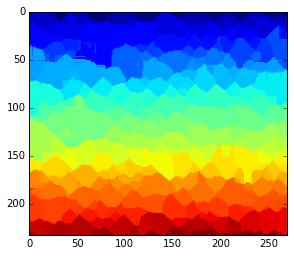

In [33]:
whole = mh.segmentation.gvoronoi(nuclei)
pylab.imshow(whole)

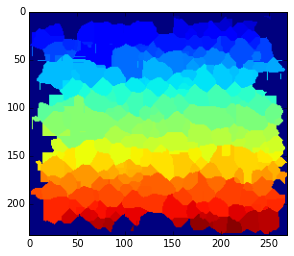

In [34]:
borders = np.zeros(nuclei.shape, np.bool)
borders[ 0,:] = 1
borders[-1,:] = 1
borders[:, 0] = 1
borders[:,-1] = 1
at_border = np.unique(nuclei[borders])
for obj in at_border:
    whole[whole == obj] = 0
pylab.imshow(whole)

In [38]:
print whole.shape
print whole.min()
print whole.max()

(233, 270)
0
339


In [42]:
se = np.ones((5,5))
rmax_big = mh.morph.dilate(rmax,se)

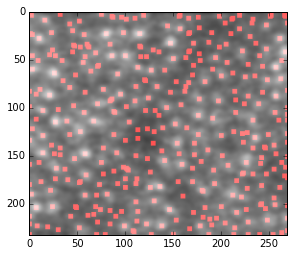

In [43]:
over = mh.overlay(imgf.astype(np.uint8),rmax_big)
pylab.imshow(over)

In [45]:
over2 = mh.overlay(img.astype(np.uint8),rmax_big)
mh.imsave('Data/copy.png',over2)